In [16]:
%matplotlib inline

In [1]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

Using TensorFlow backend.


In [2]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = '../data/train'
validation_data_dir = '../data/validation'

In [3]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size)

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size)

Found 40805 images belonging to 25 classes.
Found 8856 images belonging to 25 classes.


In [4]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(25))
model.add(Activation('softmax'))

In [5]:
# initiate RMSprop optimizer
opt = optimizers.rmsprop(lr=0.0001, decay=1e-6)

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy', 'top_k_categorical_accuracy'])

In [7]:
epochs = 30
train_samples = 40805
validation_samples = 8856

In [ ]:
model.fit_generator(
        train_generator,
        steps_per_epoch=train_samples // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_samples// batch_size,)

Epoch 1/30
1275/1275 [==============================] - 829s - loss: 2.2972 - acc: 0.3537 - top_k_categorical_accuracy: 0.6663 - val_loss: 2.2146 - val_acc: 0.3788 - val_top_k_categorical_accuracy: 0.6997
Epoch 2/30
1275/1275 [==============================] - 861s - loss: 1.5828 - acc: 0.5571 - top_k_categorical_accuracy: 0.8329 - val_loss: 1.8288 - val_acc: 0.4924 - val_top_k_categorical_accuracy: 0.7844
Epoch 3/30
1275/1275 [==============================] - 799s - loss: 1.2509 - acc: 0.6463 - top_k_categorical_accuracy: 0.8858 - val_loss: 1.6496 - val_acc: 0.5361 - val_top_k_categorical_accuracy: 0.8170
Epoch 4/30
1080/1275 [========================>.....] - ETA: 99s - loss: 1.0426 - acc: 0.7047 - top_k_categorical_accuracy: 0.9159

In [ ]:
model.save_weights('../models/basic_cnn_50_epochs.h5')

In [11]:
model.load_weights('../models/basic_cnn_30_epochs_1.h5')

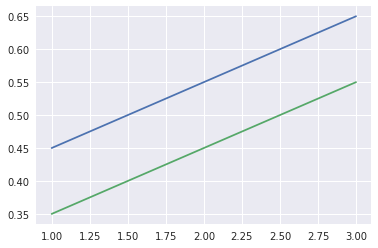

In [38]:
x = list(range(1, 4))
plt.plot(x, [0.45, 0.55, 0.65])
plt.plot(x, [0.35, 0.45, 0.55])